# Geek Girls Carrots workshop - Dzień 1

## Część 1 - pobranie danych z API Twittera

1.   Wejdź na https://developer.twitter.com/
2.   Zaloguj się do Twittera albo utwórz konto, jeżeli nie posiadasz
3.   https://developer.twitter.com/en/apply-for-access złóż prośbę o developer account
4.   Kliknij “Create an app”
5.   Wypełnij formularz i kliknij “Create”
6.   Pojawi się okienko z zasadami dla developerów. Kliknij jeszcze raz na "Create". 

W celu pobrania danych z Twittera będziemy korzystały z pakietu pythonowego o nazwie tweepy.


Dokumentację pakietu można znaleźć pod adresem: http://tweepy.readthedocs.io

Do pobrania tweetów potrzebne nam będą klucze dostępu. Po wykonaniu kroków 1-6 wejdźcie na zakładkę Keys and Access Tokens i przekopiujcie "API key" oraz "API secret key", a także "Access token" oraz "Access secret token" do poniższych zmiennych.



In [0]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

In [0]:
import tweepy

In [0]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

Przygotowujemy słownik, do którego będziemy zbierały dane.


In [0]:
tweets = {'date': [], 'text': []}

Korzystając z pętli for zbieramy dane do naszego słownika.

In [0]:
for tweet in tweepy.Cursor(api.search,q="#ArtificialIntelligence amazing",count=10,
                           lang="en",
                           since="2019-04-03", tweet_mode='extended').items():
  tweets['date'].append(tweet.created_at)
  tweets['text'].append(tweet.full_text)

**Zadanie**: Napisz funkcję, która dla danego query i od określonej daty zbierze tweety do słownika i zwróci go. parametr count niech będzie ustawiony stale na 10

In [0]:
def collect_tweets(query, start_date):
  tweets = {'date': [], 'text': []}
  for tweet in tweepy.Cursor(api.search,q=query,count=10,
                           lang="en",
                           since=start_date, tweet_mode='extended').items():
    tweets['date'].append(tweet.created_at)
    tweets['text'].append(tweet.full_text)
  return tweets

**Zadanie:** Zbierz dane dla kilku różnych zapytań na temat sztucznej inteligencji, przykładowo '#ArtificialIntelligence threat', '#ArtificialIntelligence amazing'.

In [0]:
tweets1 = collect_tweets(query="#ArtificialIntelligence amazing", start_date="2019-04-03")
tweets2 = collect_tweets(query="#ArtificialIntelligence threat", start_date="2019-04-03")

**Zadanie *** Zapoznaj się z dokumentacją pakietu newspaper3k: https://pypi.org/project/newspaper3k/
Jest to pakiet, który służy do pobierania tekstu ze stron internetowych z wiadomościami. Znajdź w internecie kilka artykułów na temat sztucznej inteligencji i pobierz tekst tych artykułów przy pomocy pakietu. Zapisz je na liście i zobacz jak wyglądają.


In [0]:
!pip install -q newspaper3k

     |████████████████████████████████| 215kB 4.9MB/s 
     |████████████████████████████████| 51kB 19.4MB/s 
     |████████████████████████████████| 7.4MB 40.8MB/s 
     |████████████████████████████████| 194kB 44.2MB/s 


In [0]:
from newspaper import Article

url = 'https://www.wired.com/story/adversarial-examples-ai-may-not-hallucinate/'
article = Article(url)

In [0]:
article.download()

In [0]:
article.text

''

##  Część 3 - Przygotowanie zbioru danych z Twittera.

Korzystając z wiedzy, którą zdobyłyśmy na temat biblioteki pandas zajmiemy się teraz przygotowaniem zbioru danych z Twittera, który jutro posłuży nam do stworzenia modelu machine learningowego.

**Zadanie:** Wczytaj pobrane wcześniej dane z Twittera do DataFrame'ów. Połącz je w jeden duży DataFrame.

In [0]:
tweet_df1 = pd.DataFrame(tweets1)
tweet_df2 = pd.DataFrame(tweets2)

In [0]:
tweet_df = tweet_df1.append(tweet_df2)

In [0]:
tweet_df.head()

,date,text
0,2019-05-10 22:00:02,How eBay is leveraging #ArtificialIntelligence...
1,2019-05-10 21:58:42,Just arrived in my inbox how frickin awesome d...
2,2019-05-10 17:57:12,RT @2morrowknight: AMAZING: #ArtificialIntelli...
3,2019-05-10 17:41:23,Just part of the data Tzager processes in seco...
4,2019-05-10 16:46:38,RT @thalesgroup: The amazing train of the futu...


**Zadanie:** Przygotuj listę tekstów z Twittera do późniejszej analizy. W tym celu należy wybrać kolumnę tekst i przekonwertować ją na listę przy użyciu funkcji `list(kolumna)` oraz przypisać do nowej zmiennej. Następnie korzystając z `list_comprehension` bądź `pętli for` należy przeprocesować każdy tekst, usuwając fragmenty, które odnoszą się do tego, że był retweetem. Przykładowo: `RT @thalesgroup:` Aby to zrobić warto skorzystać z funkcji `split(':')` i wybrać odpowiedni fragment stringa. Np: ```ab:cd.split(:)``` zwróci nam `['ab', 'cd']`. 

In [0]:
tweets_texts = list(tweet_df['text'])

In [0]:
tweets_texts = [elem.split(':')[1] for elem in tweets_texts if ':' in elem]

**Zadanie *:** Usunąć z tekstów również inne oznakowane konta. Tzn. wszystkie fragmenty, które zaczynają się od `@`.

In [0]:
#tweets_texts = [elem for elem in tweets_texts if '@' not in elem]

Aby dokonać analizy sentymentu określonych tekstów wykorzystamy bibilotekę textblob. https://textblob.readthedocs.io/ Najpierw możemy jednak spojrzeć na kilka przykładowych tweetów jaki mają sentyment w Google Cloud Natural Language Processing API. https://cloud.google.com/natural-language/

In [0]:
import random
from textblob import TextBlob

SEED=42
random.seed(SEED)

In [0]:
sample = random.sample(tweets_texts, 30)

In [0]:
for tweet in sample:
  tb = TextBlob(tweet)
  print(tweet)
  print('SENTIMENT: %s' % str(tb.sentiment.polarity))

 #Robotics is progressing at an amazing 🤯
#AI #ML #ArtificialIntelligence #IoT #Technology By @Harvard @BostonDynamics @M…
SENTIMENT: 0.6000000000000001
 @HPE_IN's Beena Ammanath takes stage at #HPEDiscoverMore.

Her expertise on #ArtificialIntelligence very amazing. She'…
SENTIMENT: 0.7800000000000001
 @HPE_IN's Beena Ammanath takes stage at #HPEDiscoverMore.

Her expertise on #ArtificialIntelligence very amazing. She'…
SENTIMENT: 0.7800000000000001
 Registrations now open for an amazing conference we organize on 13-14 June in Paris on
SENTIMENT: 0.30000000000000004
//t.co/oNAFQ8fyBc
SENTIMENT: 0.0
 #SocialMediaMarketing THEN
SENTIMENT: 0.0
 Why the #CyberSecurity Talent Shortage is the Greatest Threat #Businesses Face Today... via @TechNative https
SENTIMENT: 1.0
//t.co/oM8pHaCZsI ] #AI #AiJobs #ArtificialIntelligence  #Datascience #jobs #Hiring #Careers #LosAngeles #United States #BitCoin #ETH #crypto https
SENTIMENT: 0.0
 7 ways #AI is transforming #Healthcare &gt;&gt;&gt; @wef via

**Zadanie:** Dodaj kolumnę z sentymentem do dataframe'u z tweettami.

In [0]:
scores = []

for tweet in tweets_texts:
  tb = TextBlob(tweet)
  scores.append(tb.sentiment.polarity)

In [0]:
tweet_df['sentiment'] = pd.Series(scores)

In [0]:
tweet_df.head()

,date,text,sentiment
0,2019-05-10 22:00:02,How eBay is leveraging #ArtificialIntelligence...,0.0
1,2019-05-10 21:58:42,Just arrived in my inbox how frickin awesome d...,0.0
2,2019-05-10 17:57:12,RT @2morrowknight: AMAZING: #ArtificialIntelli...,0.6
3,2019-05-10 17:41:23,Just part of the data Tzager processes in seco...,0.0
4,2019-05-10 16:46:38,RT @thalesgroup: The amazing train of the futu...,0.3


**Zadanie:** Usuń wszystkie wiersze, w których sentyment == 0.0. Usuń duplikaty i wiersze z `NaN`.

In [0]:
tweet_df.shape

(639, 3)

In [0]:
tweet_df = tweet_df[tweet_df['sentiment']!=0.0]

In [0]:
tweet_df.shape

(346, 3)

**Zadanie:** Policz ile jest wierszy z pozytywnym i negatywnym sentymentem i jaki to odsetek wszystkich.

In [0]:
tweet_df[tweet_df['sentiment'] > 0].shape

(333, 3)

In [0]:
tweet_df[tweet_df['sentiment'] < 0].shape

(13, 3)

In [0]:
333/346*100

96.24277456647398

In [0]:
13/346*100

3.7572254335260116

**Zadanie*:** Policz ile jest wierszy z sentymentem w określonych przedziałach. Wybierz dowolną granularność. Przydatna mogą być funkcje `groupby` oraz `cut` https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html

In [0]:
import numpy as np

In [0]:
tweet_df.groupby(pd.cut(tweet_df['sentiment'], np.arange(-1, 1+0.2, 0.2))).count()

,date,text,sentiment
sentiment,,,
"(-1.0, -0.8]",0,0,0
"(-0.8, -0.6]",0,0,0
"(-0.6, -0.4]",2,2,2
"(-0.4, -0.2]",8,8,8
"(-0.2, -2.22e-16]",3,3,3
"(-2.22e-16, 0.2]",56,56,56
"(0.2, 0.4]",64,64,64
"(0.4, 0.6]",36,36,36
"(0.6, 0.8]",176,176,176


## Część 4 - Wprowadzenie do wizualizacji danych przy użyciu pandas i matplotlib.

In [0]:
imdb.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,[u'Tim Robbins'; u'Morgan Freeman'; u'Bob Gunt...
1,9.2,The Godfather,R,Crime,175,[u'Marlon Brando'; u'Al Pacino'; u'James Caan']
2,9.1,The Godfather: Part II,R,Crime,200,[u'Al Pacino'; u'Robert De Niro'; u'Robert Duv...
3,9.0,The Dark Knight,PG-13,Action,152,[u'Christian Bale'; u'Heath Ledger'; u'Aaron E...
4,8.9,Pulp Fiction,R,Crime,154,[u'John Travolta'; u'Uma Thurman'; u'Samuel L....


In [0]:
df

,oranges,bananas,apples
Anna,0,1,3
Barbara,3,0,0
Daniela,2,4,2


In [0]:
import matplotlib.pyplot as plt

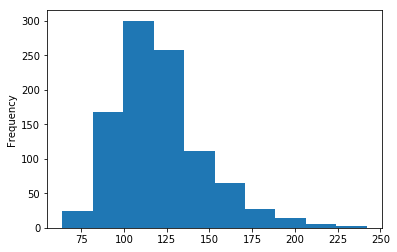

In [0]:
imdb['duration'].plot(kind='hist')

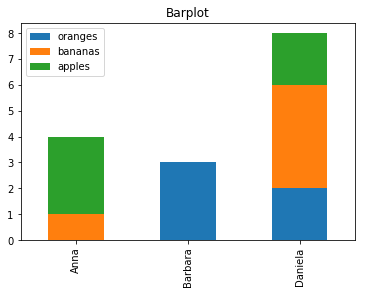

In [0]:
df.plot.bar(stacked=True, title='Barplot')

In [0]:
df2 = pd.DataFrame({'a': np.random.randn(1000) + 1, 'b': np.random.randn(1000),
                    'c': np.random.randn(1000) - 1}, columns=['a', 'b', 'c'])

In [0]:
df2.head()

,a,b,c
0,0.120424,-0.786256,-1.590579
1,1.842876,-0.471767,-1.347554
2,1.385161,0.022153,-0.837437
3,2.410094,2.116328,-0.500523
4,1.283128,0.085119,-1.060110


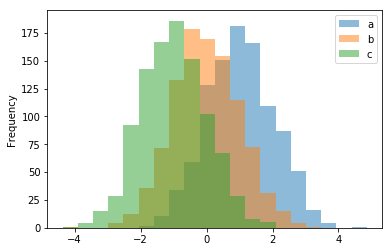

In [0]:
df2.plot.hist(alpha=0.5, bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1ee0c4dd30>,
      dtype=object)

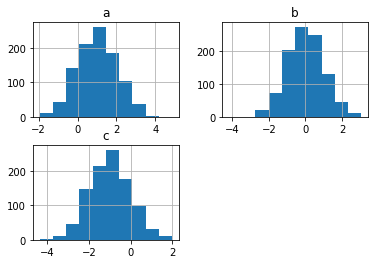

In [0]:
df2.hist()

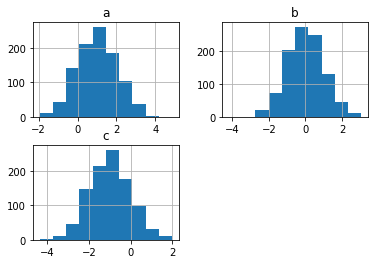

In [0]:
_ = df2.hist()

**Zadanie:** Korzystając ze zbioru imdb narysuj histogram rozkładu ratingów.

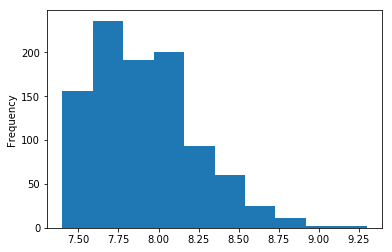

In [0]:
_ = imdb['star_rating'].plot(kind='hist', bins=10)

**Zadanie:** Policz ile jest filmów jakiego gatunku. Narysuj bar plot.

In [0]:
imdb_by_genre = imdb.groupby(['genre'])

In [0]:
genres = imdb_by_genre.count()['title']

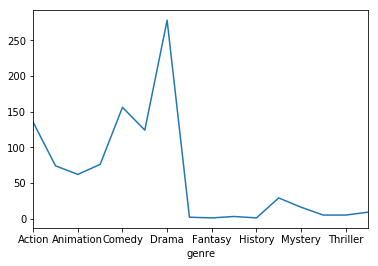

In [0]:
_ = genres.plot()

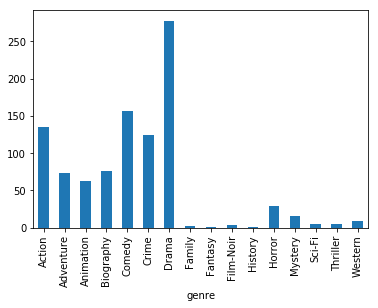

In [0]:
_ = genres.plot(kind='bar')

## Część 5 - Wprowadzenie do biblioteki spacy

Spacy jest to powszechnie używana biblioteka do przetwarzania i analizy tekstu. 

In [0]:
import spacy

In [0]:
nlp = spacy.load("en_core_web_sm")
doc = nlp(u"Apple is looking at buying U.K. startup for $1 billion")
for token in doc:
    print(token.text, token.pos_)

Apple PROPN
is VERB
looking VERB
at ADP
buying VERB
U.K. PROPN
startup NOUN
for ADP
$ SYM
1 NUM
billion NUM


In [0]:
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Apple 0 5 ORG
U.K. 27 31 GPE
$1 billion 44 54 MONEY


In [0]:
for token in doc:
    print(token.text, token.lemma_, token.is_alpha, token.is_stop)

Apple apple True False
is be True True
looking look True False
at at True True
buying buy True False
U.K. u.k. False False
startup startup True False
for for True True
$ $ False False
1 1 False False
billion billion True False


**Zadanie:** Pobierz próbkę tweetów z naszego zbioru danych. Przeanalizuj je przy pomocy spacy'ego. Czy są jakieś rzeczy, które dostrzegasz, że warto byłoby poprawić jeżeli chodzi o jakość danych?

**Dziękuję i do jutra!**

